## Langchain: Let's Start With The Basics

This is a Python notebook. It allows us to run code segments and see the results. There's a series of imports that we'll do first and then load the models from OpenAI

[LangChain Providers](https://python.langchain.com/docs/integrations/providers)

NOTE: You will need to have an environment variable of OPENAI_API_KEY with your key value

In [ ]:
pip install -q openai langchain langchain_experimental

# Other Chains!

As we talked already about simple sequential chains and their power, let's talk about other specific chains!

# SQLDatabase Chain

One of the cool things is that you can build chains for specific purposes. Let's explore what a SQLDatabaseChain might look like.

I have a simple SQLlite database loaded with information on artists, albums and other information sold

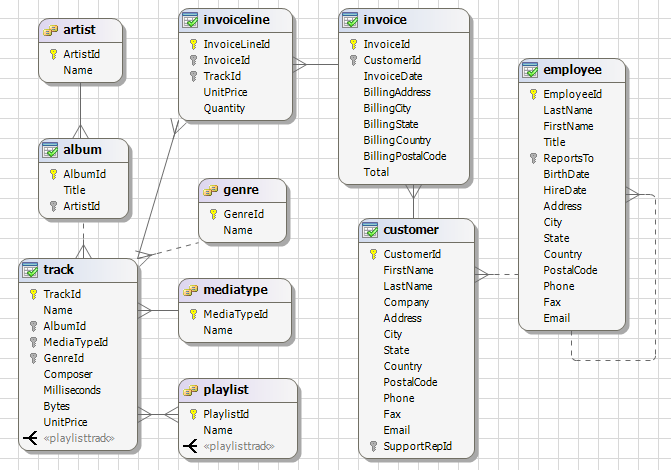

In [ ]:
from langchain_community.utilities import SQLDatabase
from langchain_experimental.sql import SQLDatabaseChain
from langchain_openai import OpenAI

db = SQLDatabase.from_uri("sqlite:///Chinook.db")
llm = OpenAI(temperature=0, verbose=True)
db_chain = SQLDatabaseChain.from_llm(llm, db, verbose=True)

In [ ]:
# start simple.. just ask a question
#db_chain.run("How many employees are there?")

# let's get a list of all the sales
#db_chain.run("List the total sales per country and list the top 5") # NOTE: Smart enough to look at Invoice table!

# let's get a list of all the sales, but then ask it to tell us which country's customers spent the most
#db_chain.run("List the total sales per country. Which country's customers spent the most")

# let's get a description of the playlisttrack table in plain english. Super powerful!
db_chain.run("Describe the playlisttrack table")

## PAL Math Chain
PAL stands for Program-Aided Language Models. It allows us to use a smart chain that will write code to solve a problem!
This allows for the results to be deterministic and not at the whim of the model to make things up or give false output

In [ ]:
from langchain.llms import OpenAI
from langchain_experimental.pal_chain.base import PALChain

In [ ]:
llm = OpenAI()

In [ ]:
pal_chain = PALChain.from_math_prompt(llm, verbose=True)

## Testing out Math Prompts
Let's try out a few options.

Look at the questions below and try each of them to see what happens as you run them through the chain

In [ ]:
question_01 = "Jan has three times the number of pets as Marcia. Marcia has two more pets than Cindy. If Cindy has four pets, how many total pets do the three have?"
question_02 = "The cafeteria had 23 apples. If they used 20 for lunch and bought 6 more, how many apples do they have?"

In [ ]:
pal_chain.run(question_02)

## API Chains - OpenMeteo - Weather information

In [ ]:
from langchain import OpenAI
from langchain.chains.api.prompt import API_RESPONSE_PROMPT

from langchain.chains import APIChain
from langchain.prompts.prompt import PromptTemplate


In [ ]:
llm = OpenAI(temperature=0,
             max_tokens=100)

from langchain.chains.api import open_meteo_docs
chain_new = APIChain.from_llm_and_api_docs(llm,
                                           open_meteo_docs.OPEN_METEO_DOCS,
                                           limit_to_domains=None,
                                           verbose=True)

In [ ]:
chain_new.run('What is the temperature like right now in Minneapolis in degrees Fahrenheit?')